# Hypothesis testing of precious metals Exchange-Traded Funds (ETFs)

In [1]:
#import the required libraries
%load_ext autoreload
%autoreload 2 
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
import json
import seaborn as sns
from data_compilation import call_all_symbols
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from data_cleaning import full_clean
from volatility import *
from visualizations import *
from hypothesis_tests import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
symbol_list = ['SLV', 'SIL', 'GLD', 'GDX', 'DJI']

In [3]:
# calling API using scripts in data_compilation
df = call_all_symbols(symbol_list)
df.tail()

The response code for SLV is 200
The response code for SIL is 200
The response code for GLD is 200
The response code for GDX is 200
The response code for DJI is 200


,open,high,low,close,volume,symbol
2000-01-07,11247.0596,11528.1396,11239.9199,11522.5596,184900000,DJI
2000-01-06,11113.3701,11313.4502,11098.4502,11253.2598,176550000,DJI
2000-01-05,10989.3701,11215.0996,10938.6699,11122.6504,203190000,DJI
2000-01-04,11349.7500,11350.0596,10986.4502,10997.9297,178420000,DJI
2000-01-03,11501.8496,11522.0098,11305.6904,11357.5098,169750000,DJI


In [4]:
# clean data using scripts in data_cleaning
df_clean = full_clean()

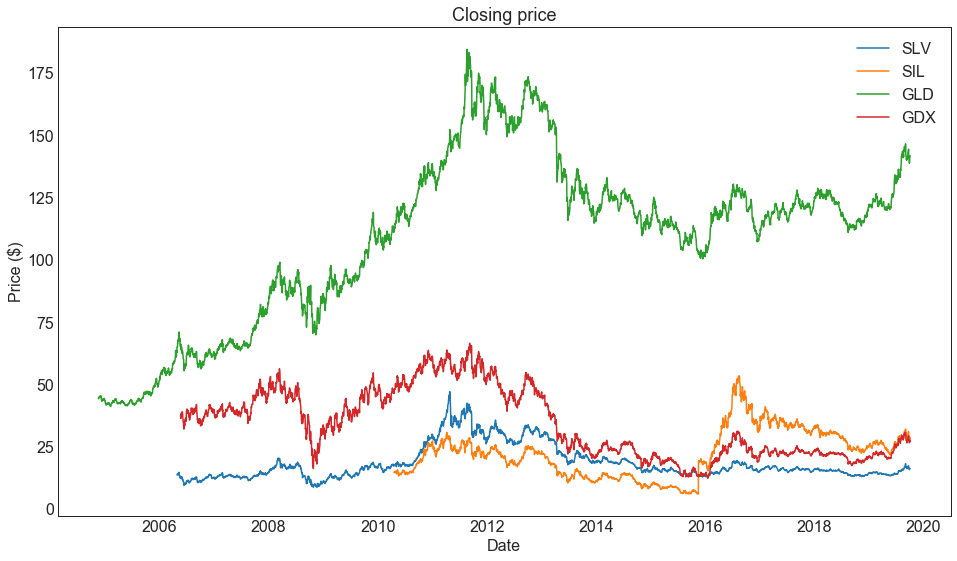

In [5]:
# make a plot from the observations
symbols = ['SLV', 'SIL', 'GLD','GDX']
visualizations_four(df_clean.copy(), symbols,
               type_price = 'close',
               start_date = '2000-01-01', 
               end_date = '2019-10-04', 
               fill_na = 'ffill',
               moving_average_plot = False,
               short_window = 20,
               long_window = 100)

## Hypothesis 1: Volatility over time

### Volatility by month

This function computes the average volatility per month, ranks the months based on their average volatility, and returns a boxplot based on the average ranking.

"Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security."

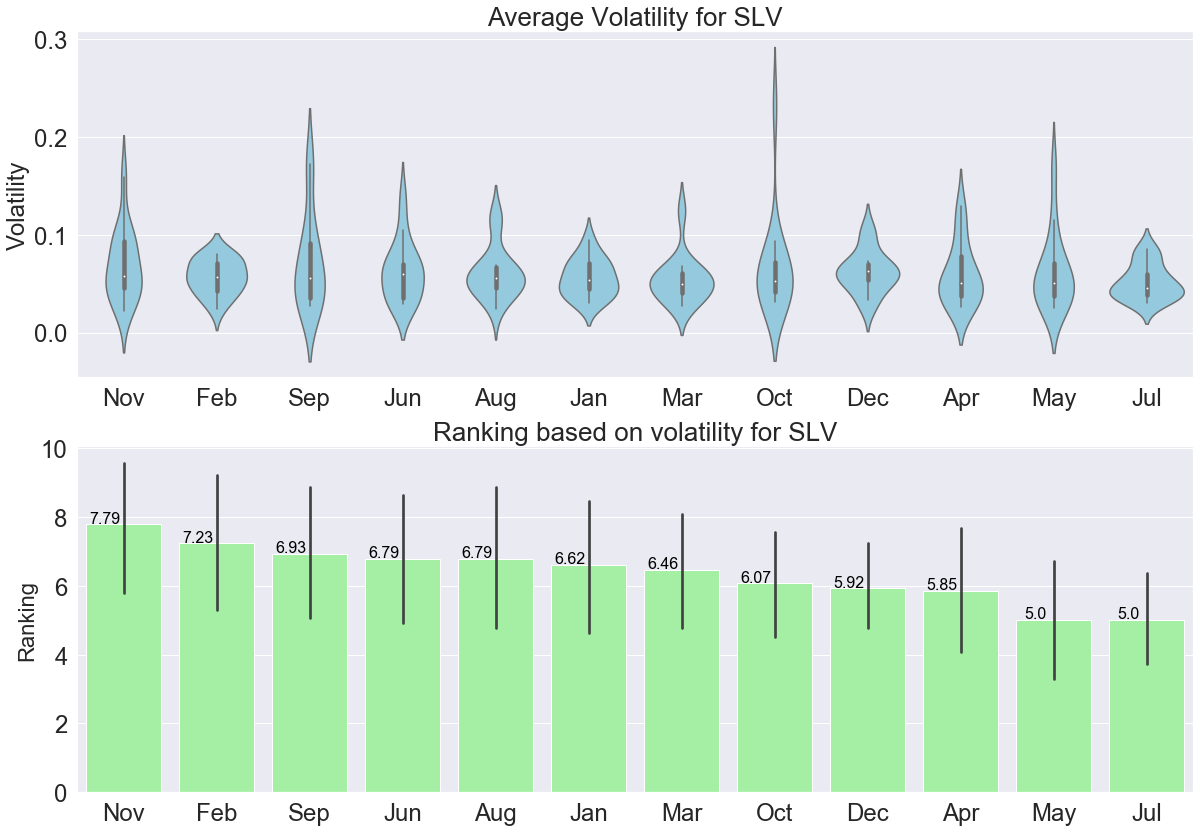

In [6]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'M'
plot_option = True
n_bootstrap = 1000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

#### Hypothesis 1A: Volatility by month

The above figure shows that Over the past 13 years, November has been the most volatile month 
on average for the SLV stock and July is the least volatile. The question
is whether this is a persistent signal or just noise in the data?

The goal of this function, here, is to statistically analyze and test
this phenomena to check whether is statistically significant or not.

$H_0$ : There is no monthly signal 

$H_A$ : There is monthly signal

Based on the p value of 0.55 and our alpha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the change in the volatility is due to chance in Apr
----------------------------------------------------------------------------------------------------
Based on the p value of 0.63 and our alpha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the change in the volatility is due to chance in Aug
----------------------------------------------------------------------------------------------------
Based on the p value of 0.6 and our alpha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the change in the volatility is due to chance in Dec
----------------------------------------------------------------------------------------------------
Based on the p value of 0.33 and our alpha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state 

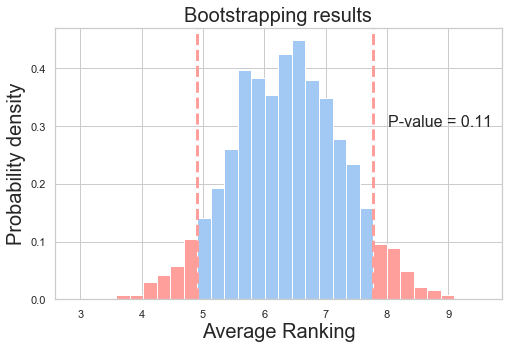

In [7]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Nov')

### Volatility by quarter

This function compute the average volatility for each quarter. 
Then, it ranks the quarters based on their average volatility and return a boxplot based on the averge ranking.

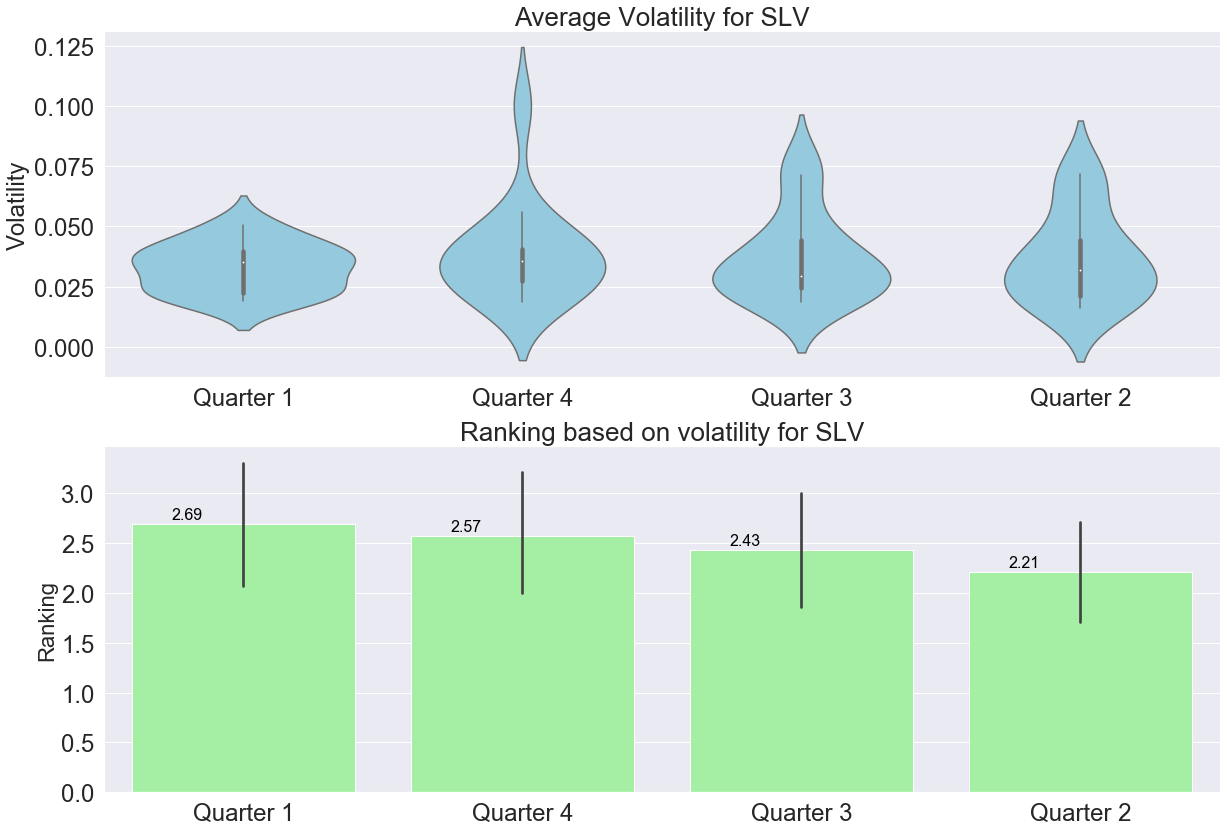

In [8]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'Q'
plot_option = True
n_bootstrap = 10000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

#### Hypothesis 1B: Volatility by quarter

The above figure shows that Over the past 13 years, Qauarter 1 has been the most volatile qauarter 
on average for the SLV stock and Qauarter 2 is the least volatile qauarter. The question
is whether this is a persistent signal or just noise in the data?

The goal of this function, here, is to statiscally analyze and test
this phenomena to check whether is statistically significant or not.

$H_0$ : There is no signal 

$H_A$ : There is a monthly signal

In [ ]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Quarter 1')

## Hypothesis 2:  Mining versus bullion ETFs

In [ ]:
# read in data and set up dataframes 
df = pd.read_csv('data/clean_data.csv', index_col=0)
df.date = pd.to_datetime(df.date)
df = df[['date','close','symbol']]
df_slv = df.loc[df.symbol == 'SLV']
df_sil = df.loc[df.symbol == 'SIL']
df_gld = df.loc[df.symbol == 'GLD']
df_gdx = df.loc[df.symbol == 'GDX']
df_dji = df.loc[df.symbol == 'DJI']

In [ ]:
# Silver bullion (SLV) average close by month
df_slv_mo = df_slv.groupby(pd.Grouper(key='date', freq='M')).mean()
df_slv_mo.plot()
plt.title('Avg close of SLV by month')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

In [ ]:
## Silver bullion (SLV) and silver mining (SIL) average close by year
df_sil_mo = df_sil.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_silvers = df_slv_mo.join(df_sil_mo,how='inner',on='date',lsuffix='_sil',rsuffix='_slv')
df_silvers.plot()
plt.title('Average close of SIL and SLV')
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.show()

In [ ]:
# Silver bullion (SLV) and silver mining (SIL) average percent change
df_silvers.pct_change().plot()
plt.title('Percent change in close of SIL and SLV')
plt.show()

In [ ]:
# Silver bullion (SLV), silver mining (SIL), and market index average percent change
df_dji_yr = df_dji.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_dji_mo = df_dji.groupby(pd.Grouper(key='date', freq='M')).mean()
df_dji_yr.head();
df_sv_ind = df_silvers.join(df_dji_mo, how='left',on='date')
df_sv_ind.pct_change().plot()
plt.title('Percent change in close of SIL, SLV, and DJI')
plt.show()

In [ ]:
# Gold bullion (GLD) and gold mining (GDX) average close by year
df_gld_yr = df_gld.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_gdx_yr = df_gdx.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_golds_yr = df_gld_yr.join(df_gdx_yr, how='left',on='date',lsuffix='_gld',rsuffix='_gdx')
df_gd_ind_yr = df_golds_yr.join(df_dji_yr,how='left',on='date')
df_golds_yr.plot()
plt.title('Average close of GLD and GDX by year')

In [ ]:
df_gld_mo = df_gld.groupby(pd.Grouper(key='date', freq='M')).mean()
df_gdx_mo = df_gdx.groupby(pd.Grouper(key='date', freq='M')).mean()
df_golds_mo = df_gld_mo.join(df_gdx_mo, how='left',on='date',lsuffix='_gld',rsuffix='_gdx')
df_gd_ind_mo = df_golds_mo.join(df_dji_mo,how='left',on='date')
df_golds_mo.plot()
plt.title('Average close of GLD and GDX by month')

In [ ]:
# Gold bullion (GLD), gold mining (GDX), and market index average percent change by year
df_gd_ind_yr.pct_change().plot()
plt.title('Percent change of GLD, GDX, and DJI by year')
plt.show()

In [ ]:
df_gd_ind_mo.pct_change().plot()
plt.title('Pct Change of GLD, GDX, and Market Index by Month')
plt.show()

In [ ]:
# autocorrelation plot with a fixed lag of 5 
plt.figure(figsize=(10,10))
lag_plot(df_gdx_mo, lag=5)
plt.title('Multi-Year GDX Autocorrelation plot')
plt.show()

In [ ]:
autocorrelation_plot(df_gdx_mo)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df_gdx_mo)
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Multi-Year GDX Close Price by Month')
plt.show()

In [ ]:
# create dataframe with one year's data 
df_gdx_mo_2019 = df_gdx_mo.loc[(df_gdx_mo.index> '2018-09-01') & (df_gdx_mo.index < '2019-09-01')]
df_gdx_mo_2019.shape
plt.plot(df_gdx_mo_2019)
plt.title('2019 GDX Price Line Plot')
plt.ylabel('Price')
plt.xlabel('Month')
plt.show()

In [ ]:
lag_plot(df_gdx_mo_2019, lag=5)
plt.title('2019 GDX Price Lag Plot')
plt.show()

In [ ]:
autocorrelation_plot(df_gdx_mo_2019)
plt.title('2019 GDX Price Autocorrelation Plot')
plt.show()

In [ ]:
df_gdx_mo_2019.plot(kind='kde')
plt.title('2019 GDX Price Density Plot')
plt.xlabel('Price')
plt.show()

### Anova Assumptions 
All populations have common variance <br>
Within each sample observations are sampled randomly and independent of each other <-- **This assumption is violated in this example because data is time series** <br>
Each group sample is drawn from normally distributed population <br>
Factor effects are additive <br>

In [ ]:
df.head()
df_recent = df.loc[(df['date'] > '2019-08-01') & (df['symbol'] != 'DJI') & (df['symbol'] != 'GLD')]
df_recent.shape
df_recent.groupby('symbol').describe()

Using $\alpha = 0.05$ <br>
<br>
$H_{o}: \mu_{1} = \mu_{2} = \mu_{3} $ <br>
$H_{a}: $ At least one of the means differs from the other means

In [ ]:
formula = 'close ~ symbol'
lm = ols(formula, df_recent).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

In [ ]:
df_recent.boxplot('close', by='symbol')
plt.xlabel('Exchange-Traded Fund')
plt.ylabel('Price')
plt.title('Mean GDX, SIL, and SLV Price since August 1, 2019')
plt.style.use('seaborn-poster')
plt.suptitle('')
plt.savefig('img/boxplot_means.png')

Reject $H_{o}$

## Hypothesis 3: Silver versus gold bullion short-term investments

In [ ]:
visualization_SLV_vs_GLD_5yrs(df_clean, date='2014-10-06')

From the above graph, 

### Comparing daily movements : SLV vs GLD
#### $H{0}$: daily_movement_SLV - daily_movement_GLD = 0
#### $H{a}$: daily_movement_SLV - daily_movement_GLD > 0

In [ ]:
#Prepare dataset
a_day,b_day = hypothesis_test_three_prep(df_clean, type = 'day')

In [ ]:
#Check for normality

day_movement_diff = a_day-b_day
print(stats.normaltest(day_movement_diff))
fig,ax = plt.subplots(1,2, tight_layout=True)
sns.boxplot(day_movement_diff,ax=ax[0])
sns.distplot(day_movement_diff,ax=ax[1]);

In [ ]:
#Perform paired t-test
hypothesis_test_three_pttest(a_day,b_day)

### Looking at weekly movement: SLV vs GLD

#### $𝐻{0} $ : weekly movement SLV  - weekly movement  GLD = 0 
#### $𝐻{a} $ : weekly movement SLV  - weekly movement GLD > 0 

In [ ]:
#Prepare dataset
a_wk,b_wk = hypothesis_test_three_prep(df_clean, type = 'week')

In [ ]:
#Check for normality
week_movement_diff = a_wk-b_wk
print(stats.normaltest(week_movement_diff))
fig,ax = plt.subplots(1,2, tight_layout=True)
sns.boxplot(week_movement_diff,ax=ax[0])
sns.distplot(week_movement_diff,ax=ax[1]);

In [ ]:
#Perform paired t-test
hypothesis_test_three_pttest(a_wk,b_wk)

### Looking at monthly movement : SLV vs GLD

#### $𝐻{0} $ : monthly movement SLV  - monthly movement  GLD = 0 
#### $𝐻{a} $ : monthly movement SLV  - monthly movement GLD > 0 

In [ ]:
#Prepare dataset
a_mo,b_mo = hypothesis_test_three_prep(df_clean, type = 'month')

In [ ]:
#Check for normality
mo_movement_diff = a_mo-b_mo
print(stats.normaltest(mo_movement_diff))
fig,ax = plt.subplots(1,2, tight_layout=True)
sns.boxplot(mo_movement_diff,ax=ax[0])
sns.distplot(mo_movement_diff,ax=ax[1]);

In [ ]:
#Perform paired t-test
hypothesis_test_three_pttest(a_mo,b_mo)